### Import all libraries and dictionaries

In [1]:
from my_methods import *

In [5]:
ExE = json_load('1-PCC_Values/ExE_pcc_mul.json')
NxN = json_load('1-PCC_Values/NxN_pcc_mul.json')
GLOBAL = json_load('1-PCC_Values/global_network_mul.json')

### Convierto los dataframes a diccionarios

In [3]:
def compare_dictionaries(dic1, dic2, xaxis='dic1', yaxis='dic2', c='blue', save=False, name='default.png'):
    list1=[]
    list2=[]
    for key in dic1.keys():
        for key1 in dic1[key]:
            if key in dic2.keys() and key1 in dic2[key].keys():
                list1.append(dic1[key][key1])
                list2.append(dic2[key][key1])
    plt.figure(figsize=(10,10))
    plt.scatter(list1, list2, s=0.2, c=c)
    plt.plot(np.arange(-1,1,0.1), np.arange(-1,1,0.1), c='k', zorder=2, alpha=0.5)
    plt.xlabel(xaxis, fontsize=15)
    plt.ylabel(yaxis, fontsize=15)
    plt.xticks(np.arange(-1,1,0.2), fontsize=15)
    plt.yticks(np.arange(-1,1,0.2), fontsize=15)
    plt.grid(True)
    if save:
        plt.savefig(name)

In [4]:
ExE_costanzo = extract_dictionary(load_dataframe('data/Essential_Similarity_Network.txt'))

In [8]:
NxN_costanzo = extract_dictionary(load_dataframe('data/Nonessential_Similarity_Network.txt'))

In [10]:
GLOBAL_costanzo = extract_dictionary(load_dataframe('data/Global_Similarity_Network.txt'))

### Ahora comparo mis diccionarios con la data de Costanzo

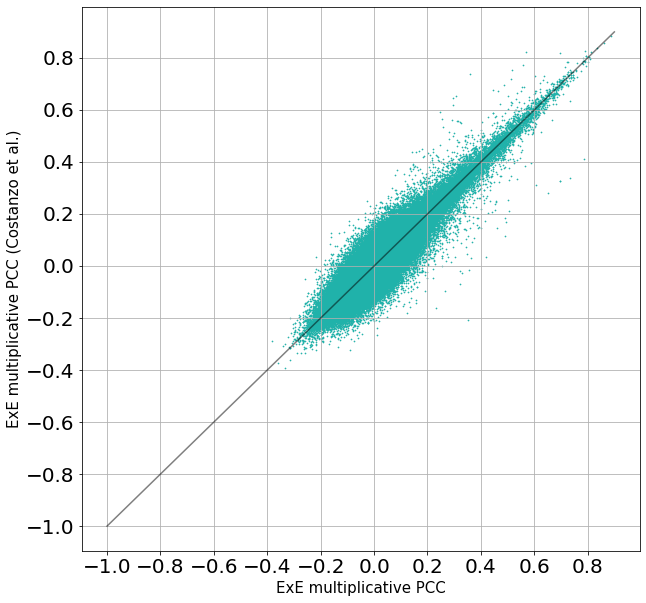

In [9]:
compare_dictionaries(ExE, ExE_costanzo, xaxis = 'ExE multiplicative PCC', yaxis='ExE multiplicative PCC (Costanzo et al.)', c = 'lightseagreen', save=True, name='img/ExE_comparison.png')

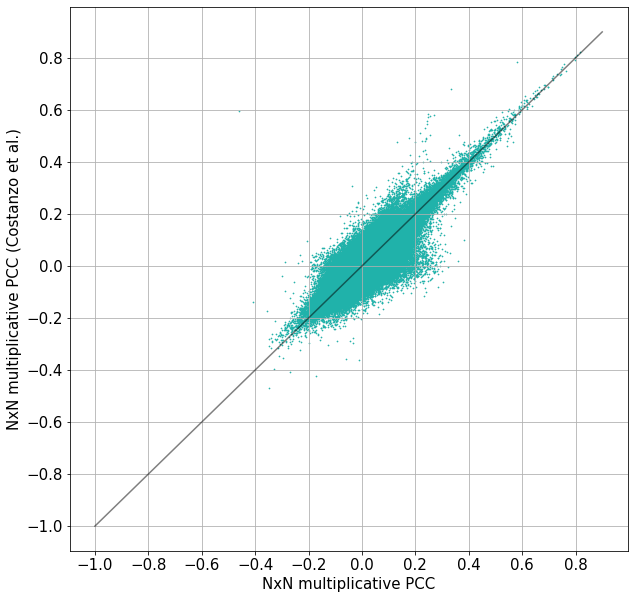

In [9]:
compare_dictionaries(NxN, NxN_costanzo, xaxis = 'NxN multiplicative PCC', yaxis='NxN multiplicative PCC (Costanzo et al.)', c = 'lightseagreen', save=True, name='img/NxN_comparison.png')

In [18]:
def compare_dictionaries(dic1, dic2, xaxis='dic1', yaxis='dic2', c='blue', save=False, name='default.png'):
    list0=[]
    for key in dic1.keys():
        for key1 in dic1[key]:
            if key in dic2.keys() and key1 in dic2[key].keys():
                list0.append((dic1[key][key1], dic2[key][key1]))
    plt.figure(figsize=(10,10))
    
    part1 = list0[:int(len(list0)/4)]
    part2 = list0[int(len(list0)/4):int(len(list0)/2)]
    part3 = list0[int(len(list0)/2):int(3*len(list0)/4)]
    part4 = list0[int(3*len(list0)/4):]
    
    plt.scatter(list(map(lambda x: x[0], part1)), list(map(lambda x: x[1], part1)), s=0.2, c=c)
    plt.scatter(list(map(lambda x: x[0], part2)), list(map(lambda x: x[1], part2)), s=0.2, c=c)
    plt.scatter(list(map(lambda x: x[0], part3)), list(map(lambda x: x[1], part3)), s=0.2, c=c)
    plt.scatter(list(map(lambda x: x[0], part4)), list(map(lambda x: x[1], part4)), s=0.2, c=c)
    
    plt.plot(np.arange(-1,1,0.1), np.arange(-1,1,0.1), c='k', zorder=2, alpha=0.5)
    plt.xlabel(xaxis, fontsize=15)
    plt.ylabel(yaxis, fontsize=15)
    plt.xticks(np.arange(-1,1,0.2), fontsize=20)
    plt.yticks(np.arange(-1,1,0.2), fontsize=20)
    plt.grid(True)
    if save:
        plt.savefig(name)

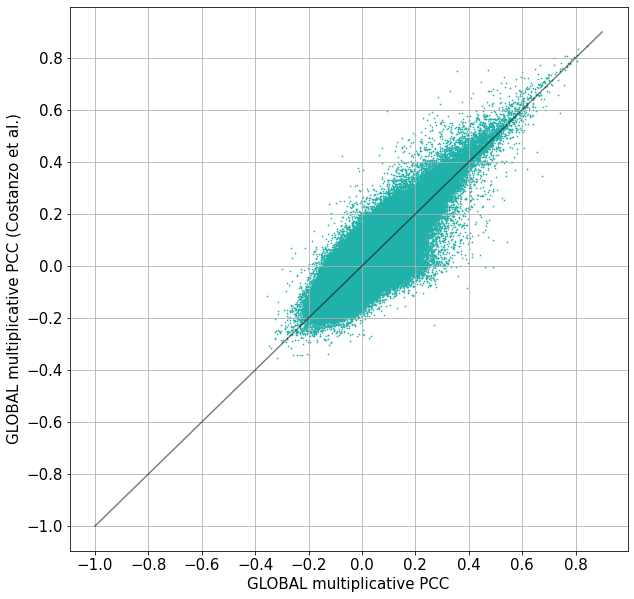

In [11]:
compare_dictionaries(GLOBAL, GLOBAL_costanzo, xaxis = 'GLOBAL multiplicative PCC', yaxis='GLOBAL multiplicative PCC (Costanzo et al.)', c = 'lightseagreen', save=True, name='img/GLOBAL_comparison.png')

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
list_of_dics = [(ExE, ExE_costanzo), (NxN, NxN_costanzo), (GLOBAL, GLOBAL_costanzo)]
list_of_labels = ['ExE', 'NxN', 'GLOBAL']
for i in range(len(ax)):
    list1 = []
    list2 = []
    dic1 = list_of_dics[i][0]
    dic2 = list_of_dics[i][1]
    for key in dic1.keys():
        for key1 in dic1[key]:
            if key in dic2.keys() and key1 in dic2[key].keys():
                list1.append(dic1[key][key1])
                list2.append(dic2[key][key1])
    ax[i].scatter(list1, list2, s=0.2, c='lightseagreen', alpha=0.7)
    ax[i].plot(np.arange(-1,1,0.1), np.arange(-1,1,0.1), c='k', zorder=2, lw=2, alpha=0.8)
    ax[i].set_xlabel(list_of_labels[i], fontsize=18)
    ax[i].set_ylabel(list_of_labels[i]+' Costanzo et al.', fontsize=18)
    ax[i].set_xticks(np.arange(-1,1,0.2))
    plt.grid(True)
    ax[i].grid(True)
plt.tight_layout()
fig.savefig('img/all_comparisons.png')

: 

: 